In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install pyspark
!pip install findspark

In [4]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.4.1-bin-hadoop3'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Big Data Lanjut/dataset/global_warming_dataset.csv')

# Cek info awal
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Country                        100000 non-null  object 
 1   Year                           100000 non-null  int64  
 2   Temperature_Anomaly            100000 non-null  float64
 3   CO2_Emissions                  100000 non-null  float64
 4   Population                     100000 non-null  float64
 5   Forest_Area                    100000 non-null  float64
 6   GDP                            100000 non-null  float64
 7   Renewable_Energy_Usage         100000 non-null  float64
 8   Methane_Emissions              100000 non-null  float64
 9   Sea_Level_Rise                 100000 non-null  float64
 10  Arctic_Ice_Extent              100000 non-null  float64
 11  Urbanization                   100000 non-null  float64
 12  Deforestation_Rate             

Country                          0
year                             0
Temperature_Anomaly              0
co2_emissions                    0
Population                       0
Forest_Area                      0
GDP                              0
Renewable_Energy_Usage           0
methane_emissions                0
Sea_Level_Rise                   0
Arctic_Ice_Extent                0
Urbanization                     0
Deforestation_Rate               0
Extreme_Weather_Events           0
Average_Rainfall                 0
Solar_Energy_Potential           0
Waste_Management                 0
Per_Capita_Emissions             0
Industrial_Activity              0
Air_Pollution_Index              0
Biodiversity_Index               0
Ocean_Acidification              0
Fossil_Fuel_Usage                0
Energy_Consumption_Per_Capita    0
Policy_Score                     0
Average_Temperature              0
Renewable_Energy_Category        0
CO2_Emissions_Category           0
Deforestation_Rate_C

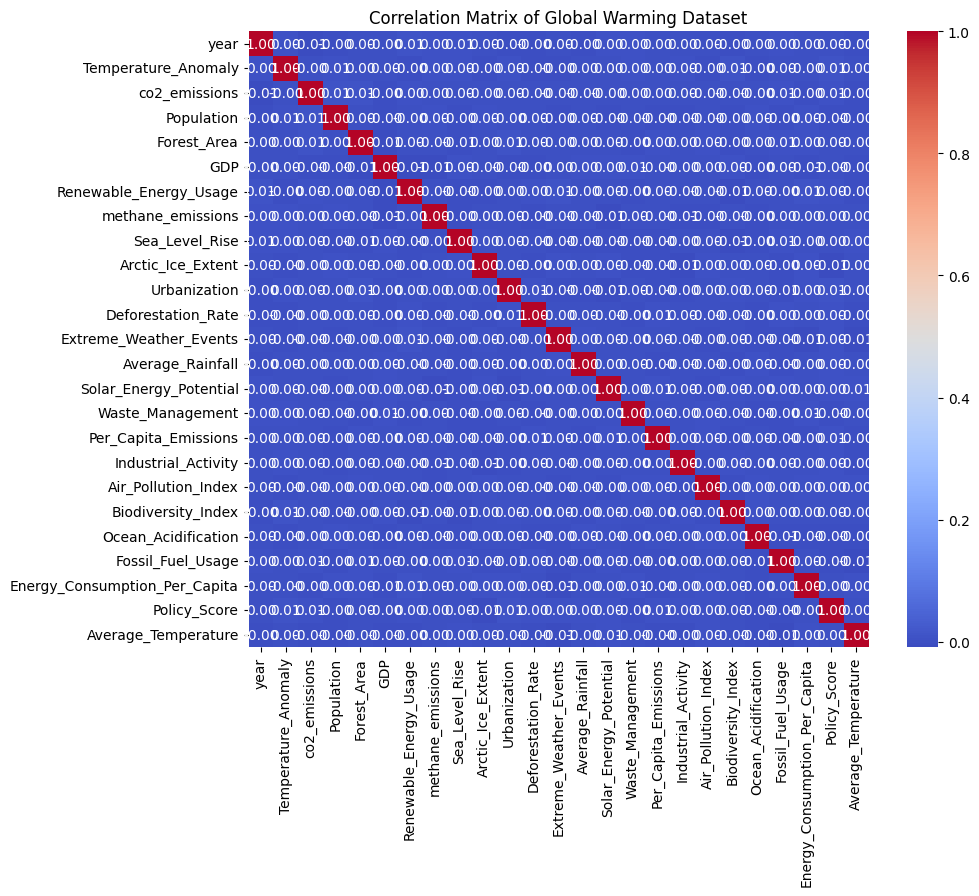

In [11]:
# Rename columns (example, adjust as needed)
data = data.rename(columns={
    'Year': 'year',
    'CO2_Emissions': 'co2_emissions',  # Changed 'CO2' to 'CO2_Emissions'
    'Methane_Emissions': 'methane_emissions'  # Changed 'Methane' to 'Methane_Emissions'
    # Add more column renaming as required
})

# Check for null values
print(data.isnull().sum())

# Handle missing values (example: fill with mean)
for col in ['co2_emissions', 'methane_emissions']: # Replace with your relevant columns
    if data[col].isnull().any():
        data[col] = data[col].fillna(data[col].mean())

# Convert data types if needed
for col in ['year', 'co2_emissions', 'methane_emissions']: #Replace with your relevant columns
    if data[col].dtype == 'object':
        try:
          data[col] = pd.to_numeric(data[col])
        except:
          print(f"Couldn't convert column {col} to numeric")


# Summary statistics
print(data.describe())

# Correlation matrix
# Selecting only numerical features for correlation calculation
numerical_features = data.select_dtypes(include=['number'])
correlation_matrix = numerical_features.corr()
print(correlation_matrix)

# Visualization of correlation matrix (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Global Warming Dataset')
plt.show()

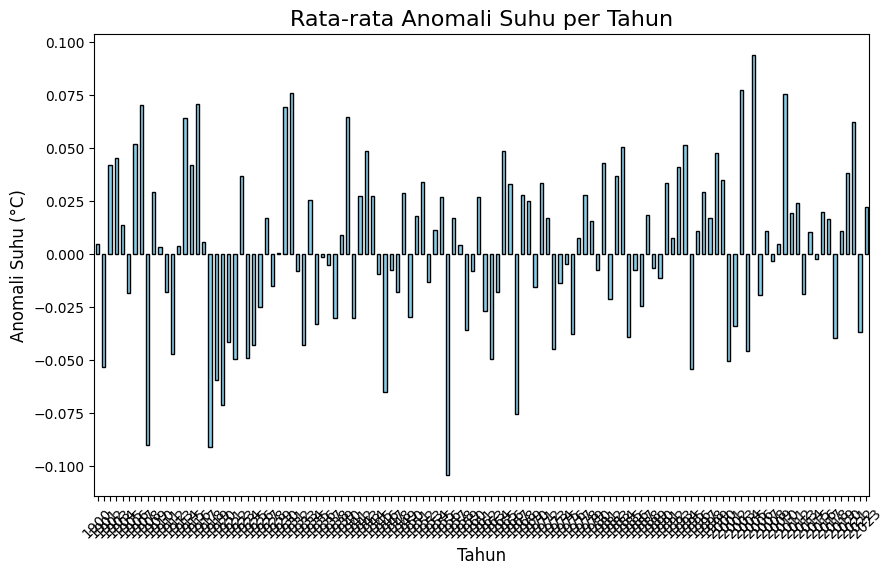

In [6]:
plt.figure(figsize=(10, 6))
avg_temp_per_year = data.groupby('Year')['Temperature_Anomaly'].mean()
avg_temp_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Rata-rata Anomali Suhu per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Anomali Suhu (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


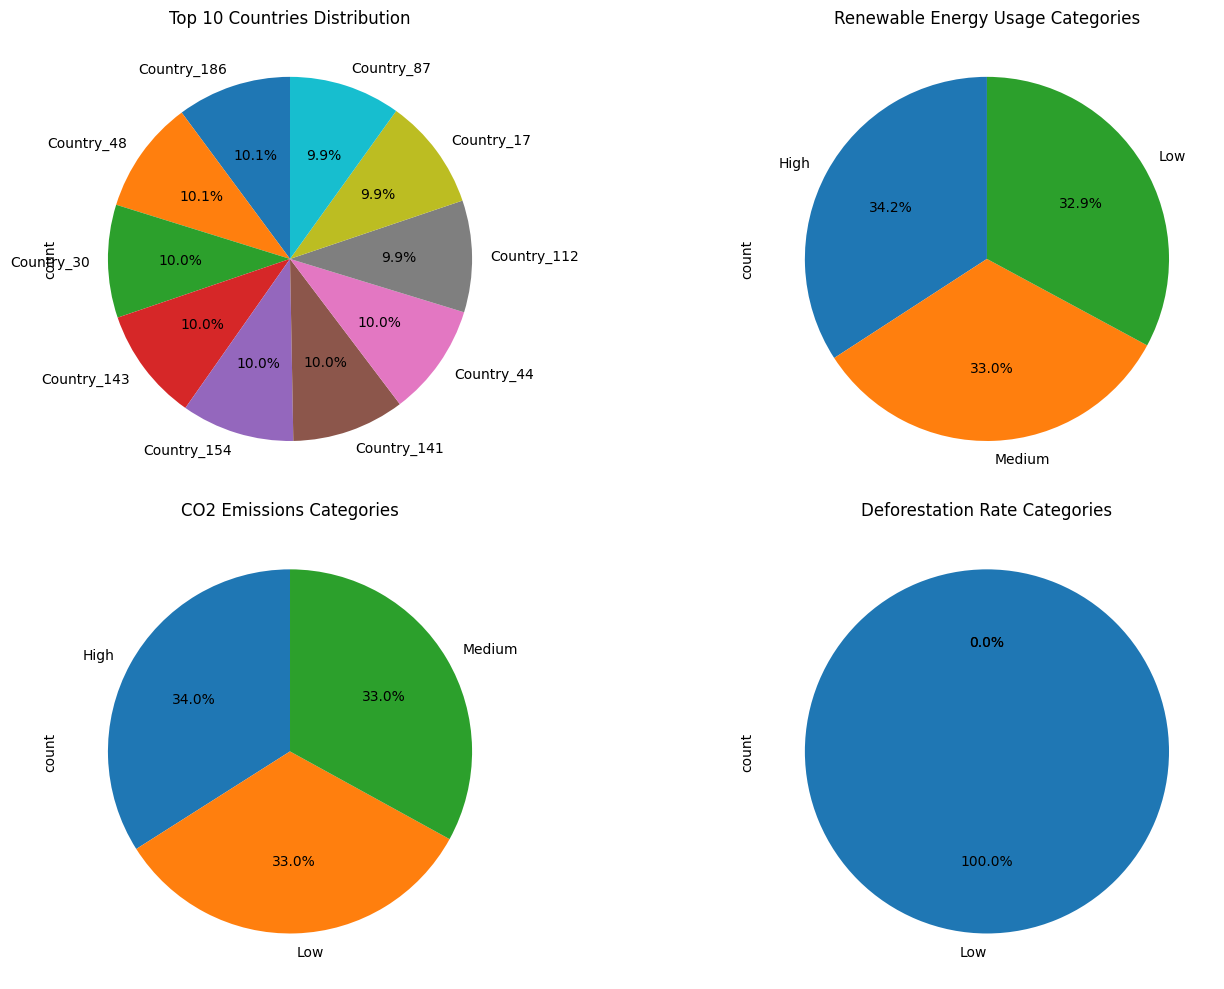

In [ ]:
import matplotlib.pyplot as plt

# 1. Distribusi Negara
country_distribution = data['Country'].value_counts().head(10)  # Top 10 countries

# 2. Kategori Penggunaan Energi Terbarukan
bins_renewable = [0, 33, 66, 100]
labels_renewable = ['Low', 'Medium', 'High']
data['Renewable_Energy_Category'] = pd.cut(data['Renewable_Energy_Usage'], bins=bins_renewable, labels=labels_renewable)
renewable_distribution = data['Renewable_Energy_Category'].value_counts()

# 3. Kategori Emisi CO2
bins_co2 = [0, data['CO2_Emissions'].quantile(0.33), data['CO2_Emissions'].quantile(0.66), data['CO2_Emissions'].max()]
labels_co2 = ['Low', 'Medium', 'High']
data['CO2_Emissions_Category'] = pd.cut(data['CO2_Emissions'], bins=bins_co2, labels=labels_co2)
co2_distribution = data['CO2_Emissions_Category'].value_counts()

# 4. Kategori Laju Deforestasi
bins_deforestation = [0, 33, 66, 100]
labels_deforestation = ['Low', 'Medium', 'High']
data['Deforestation_Rate_Category'] = pd.cut(data['Deforestation_Rate'], bins=bins_deforestation, labels=labels_deforestation)
deforestation_distribution = data['Deforestation_Rate_Category'].value_counts()

# Plotting pie charts
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Distribusi Negara
country_distribution.plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90, title="Top 10 Countries Distribution")

# Distribusi Energi Terbarukan
renewable_distribution.plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, title="Renewable Energy Usage Categories")

# Distribusi Emisi CO2
co2_distribution.plot.pie(ax=axes[2], autopct='%1.1f%%', startangle=90, title="CO2 Emissions Categories")

# Distribusi Laju Deforestasi
deforestation_distribution.plot.pie(ax=axes[3], autopct='%1.1f%%', startangle=90, title="Deforestation Rate Categories")

plt.tight_layout()
plt.show()


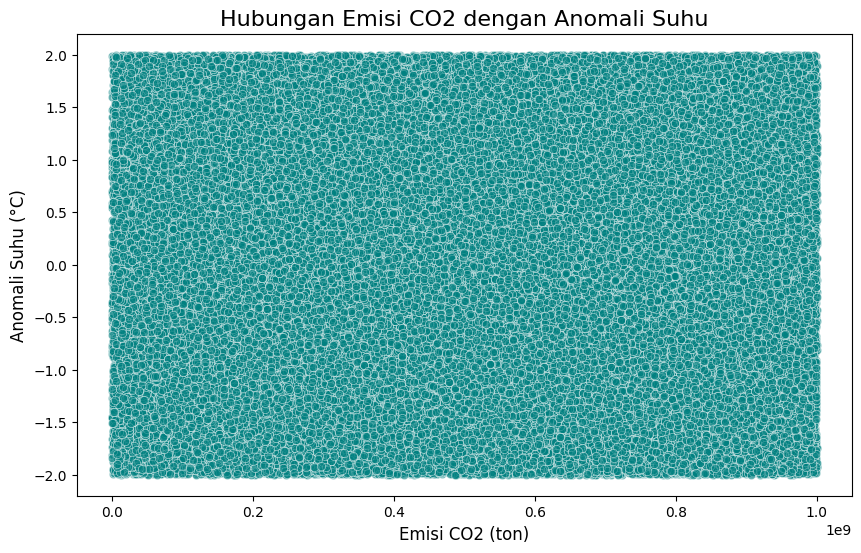

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='CO2_Emissions', y='Temperature_Anomaly', alpha=0.6, color='teal')
plt.title('Hubungan Emisi CO2 dengan Anomali Suhu', fontsize=16)
plt.xlabel('Emisi CO2 (ton)', fontsize=12)
plt.ylabel('Anomali Suhu (°C)', fontsize=12)
plt.show()


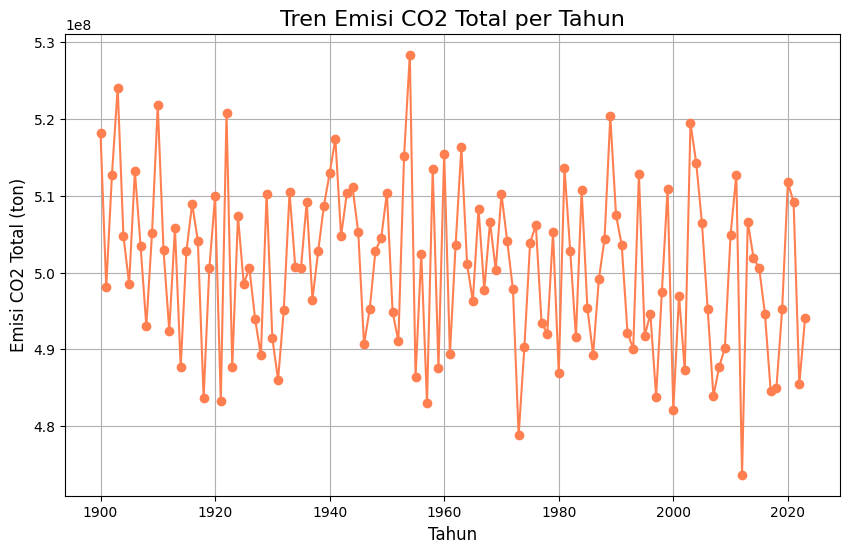

In [ ]:
plt.figure(figsize=(10, 6))
data.groupby('Year')['CO2_Emissions'].mean().plot(kind='line', marker='o', color='coral')
plt.title('Tren Emisi CO2 Total per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Emisi CO2 Total (ton)', fontsize=12)
plt.grid(True)
plt.show()


In [7]:
# Correcting the creation of 'Renewable_Energy_Category' column in the pandas DataFrame first
bins_renewable = [0, 33, 66, 100]
labels_renewable = ['Low', 'Medium', 'High']

# Creating the category in pandas first to avoid Spark column name issues
data['Renewable_Energy_Category'] = pd.cut(data['Renewable_Energy_Usage'], bins=bins_renewable, labels=labels_renewable)

# Save the corrected data to be loaded into Spark
corrected_file_path = '/content/drive/MyDrive/Big Data Lanjut/dataset/global_warming_dataset.csv'
data.to_csv(corrected_file_path, index=False)

# Reload the corrected data into Spark
data_spark = spark.read.csv(corrected_file_path, header=True, inferSchema=True)

# Re-run preprocessing steps in Spark
data_spark = data_spark.withColumn(
    "Renewable_Target",
    (data_spark["Renewable_Energy_Category"] == "High").cast("integer")
)

# Drop unnecessary columns for simplicity
columns_to_use = [
    "Temperature_Anomaly", "CO2_Emissions", "Population",
    "Deforestation_Rate", "GDP", "Renewable_Target"
]
data_spark = data_spark.select(columns_to_use).na.drop()

# Assemble features
assembler = VectorAssembler(inputCols=[col for col in columns_to_use if col != "Renewable_Target"], outputCol="features")
data_spark = assembler.transform(data_spark)

# Verify corrected preprocessing steps
data_spark.show(5)


NameError: name 'spark' is not defined

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, LogisticRegression, MultilayerPerceptronClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Initialize Spark session
spark = SparkSession.builder.appName("ML_Models_Comparison").getOrCreate()

# Load data into Spark DataFrame
data_spark = spark.read.csv(file_path, header=True, inferSchema=True)

# Preprocessing: Target variable encoding (High -> 1, else -> 0)
data_spark = data_spark.withColumn(
    "Renewable_Target",
    (data_spark["Renewable_Energy_Category"] == "High").cast("integer")
)

# Drop unnecessary columns for simplicity
columns_to_use = [
    "Temperature_Anomaly", "CO2_Emissions", "Population",
    "Deforestation_Rate", "GDP", "Renewable_Target"
]
data_spark = data_spark.select(columns_to_use).na.drop()

# Assemble features
assembler = VectorAssembler(inputCols=[col for col in columns_to_use if col != "Renewable_Target"], outputCol="features")
data_spark = assembler.transform(data_spark)

# Split data into train and test sets
train_data, test_data = data_spark.randomSplit([0.8, 0.2], seed=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(labelCol="Renewable_Target", featuresCol="features", numTrees=100),
    "Gradient Boosted Tree": GBTClassifier(labelCol="Renewable_Target", featuresCol="features", maxIter=50),
    "Logistic Regression": LogisticRegression(labelCol="Renewable_Target", featuresCol="features"),
    "Multilayer Perceptron": MultilayerPerceptronClassifier(labelCol="Renewable_Target", featuresCol="features",
                                                             layers=[5, 10, 5, 2], seed=42)
}

# Train and evaluate models
results = []
evaluator_auc = BinaryClassificationEvaluator(labelCol="Renewable_Target", metricName="areaUnderROC")
evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Renewable_Target", metricName="f1")
evaluator_accuracy = MulticlassClassificationEvaluator(labelCol="Renewable_Target", metricName="accuracy")
evaluator_precision = MulticlassClassificationEvaluator(labelCol="Renewable_Target", metricName="weightedPrecision")
evaluator_recall = MulticlassClassificationEvaluator(labelCol="Renewable_Target", metricName="weightedRecall")

for model_name, model in models.items():
    # Train model
    trained_model = model.fit(train_data)
    predictions = trained_model.transform(test_data)

    # Evaluate model
    auc = evaluator_auc.evaluate(predictions)
    f1 = evaluator_f1.evaluate(predictions)
    accuracy = evaluator_accuracy.evaluate(predictions)
    precision = evaluator_precision.evaluate(predictions)
    recall = evaluator_recall.evaluate(predictions)

    results.append((model_name, auc, accuracy, f1, precision, recall))

# Display results
results_df = pd.DataFrame(results, columns=["Model", "AUC", "Accuracy", "F1 Score", "Precision", "Recall"])
results_df.sort_values(by="AUC", ascending=False)


,Model,AUC,Accuracy,F1 Score,Precision,Recall
1,Gradient Boosted Tree,0.502422,0.654008,0.520119,0.547511,0.654008
3,Multilayer Perceptron,0.502113,0.655059,0.518534,0.429102,0.655059
0,Random Forest,0.501201,0.655059,0.518534,0.429102,0.655059
2,Logistic Regression,0.501143,0.655059,0.518534,0.429102,0.655059


hypertuning


In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluator for tuning
evaluator = BinaryClassificationEvaluator(labelCol="Renewable_Target", metricName="areaUnderROC")

# Hyperparameter tuning for Random Forest
rf = RandomForestClassifier(labelCol="Renewable_Target", featuresCol="features")
rf_param_grid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100, 150]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .addGrid(rf.maxBins, [32, 64]) \
    .build()

rf_cv = CrossValidator(
    estimator=rf,
    estimatorParamMaps=rf_param_grid,
    evaluator=evaluator,
    numFolds=3  # 3-fold cross-validation
)

# Hyperparameter tuning for Gradient Boosted Trees
gbt = GBTClassifier(labelCol="Renewable_Target", featuresCol="features")
gbt_param_grid = ParamGridBuilder() \
    .addGrid(gbt.maxIter, [20, 50, 100]) \
    .addGrid(gbt.maxDepth, [5, 10, 15]) \
    .addGrid(gbt.stepSize, [0.1, 0.2, 0.3]) \
    .build()

gbt_cv = CrossValidator(
    estimator=gbt,
    estimatorParamMaps=gbt_param_grid,
    evaluator=evaluator,
    numFolds=3
)

# Perform hyperparameter tuning for both models
print("Tuning Random Forest...")
rf_cv_model = rf_cv.fit(train_data)
print("Tuning Gradient Boosted Trees...")
gbt_cv_model = gbt_cv.fit(train_data)

# Evaluate tuned models on test data
rf_best_model = rf_cv_model.bestModel
gbt_best_model = gbt_cv_model.bestModel

rf_predictions = rf_best_model.transform(test_data)
gbt_predictions = gbt_best_model.transform(test_data)

rf_auc = evaluator.evaluate(rf_predictions)
gbt_auc = evaluator.evaluate(gbt_predictions)

# Compare results
print("Random Forest Best AUC:", rf_auc)
print("Gradient Boosted Trees Best AUC:", gbt_auc)

# Determine the best model based on AUC
if rf_auc > gbt_auc:
    print("Random Forest is the best model.")
    best_model = rf_best_model
else:
    print("Gradient Boosted Trees is the best model.")
    best_model = gbt_best_model

# Save the best model
best_model.write().overwrite().save("/mnt/data/best_model")


In [8]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Evaluator untuk AUC
auc_evaluator = BinaryClassificationEvaluator(labelCol="Renewable_Target", metricName="areaUnderROC")

# =============================
# Gradient Boosted Tree Hypertuning
# =============================
gbt = GBTClassifier(labelCol="Renewable_Target", featuresCol="features")

# Parameter grid untuk GBT
gbt_param_grid = (
    ParamGridBuilder()
    .addGrid(gbt.maxDepth, [3, 5, 7])
    .addGrid(gbt.maxIter, [20, 50, 100])
    .addGrid(gbt.stepSize, [0.05, 0.1, 0.2])
    .build()
)

# CrossValidator untuk GBT
gbt_cv = CrossValidator(
    estimator=gbt,
    estimatorParamMaps=gbt_param_grid,
    evaluator=auc_evaluator,
    numFolds=3,  # 3-fold cross-validation
    seed=42
)

# =============================
# Multilayer Perceptron Hypertuning
# =============================
mlp = MultilayerPerceptronClassifier(labelCol="Renewable_Target", featuresCol="features", seed=42)

# Parameter grid untuk MLP
mlp_param_grid = (
    ParamGridBuilder()
    .addGrid(mlp.layers, [[5, 10, 5, 2], [5, 20, 10, 2]])  # Coba arsitektur berbeda
    .addGrid(mlp.maxIter, [50, 100, 200])
    .addGrid(mlp.stepSize, [0.01, 0.05, 0.1])
    .build()
)

# CrossValidator untuk MLP
mlp_cv = CrossValidator(
    estimator=mlp,
    estimatorParamMaps=mlp_param_grid,
    evaluator=auc_evaluator,
    numFolds=3,  # 3-fold cross-validation
    seed=42
)

# =============================
# Melatih model dengan CrossValidator
# =============================
print("Training Gradient Boosted Tree...")
gbt_model = gbt_cv.fit(train_data)
print("Training Multilayer Perceptron...")
mlp_model = mlp_cv.fit(train_data)

# =============================
# Evaluasi hasil terbaik
# =============================
gbt_best_model = gbt_model.bestModel
mlp_best_model = mlp_model.bestModel

# Evaluasi pada data uji
gbt_predictions = gbt_best_model.transform(test_data)
mlp_predictions = mlp_best_model.transform(test_data)

gbt_auc = auc_evaluator.evaluate(gbt_predictions)
mlp_auc = auc_evaluator.evaluate(mlp_predictions)

print(f"Best Gradient Boosted Tree AUC: {gbt_auc}")
print(f"Best Multilayer Perceptron AUC: {mlp_auc}")


AssertionError: 